In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#read the cv file and show the data columns
heart_data=pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_data.shape

(1025, 14)

In [4]:
#getting some info regarding the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#staistical measure for data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#checking the distribution for target variable
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
# prompt: check for correlation between colums in targets by coefficient and

corr_matrix = heart_data.corr()
print(corr_matrix['target'].sort_values(ascending=False))


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


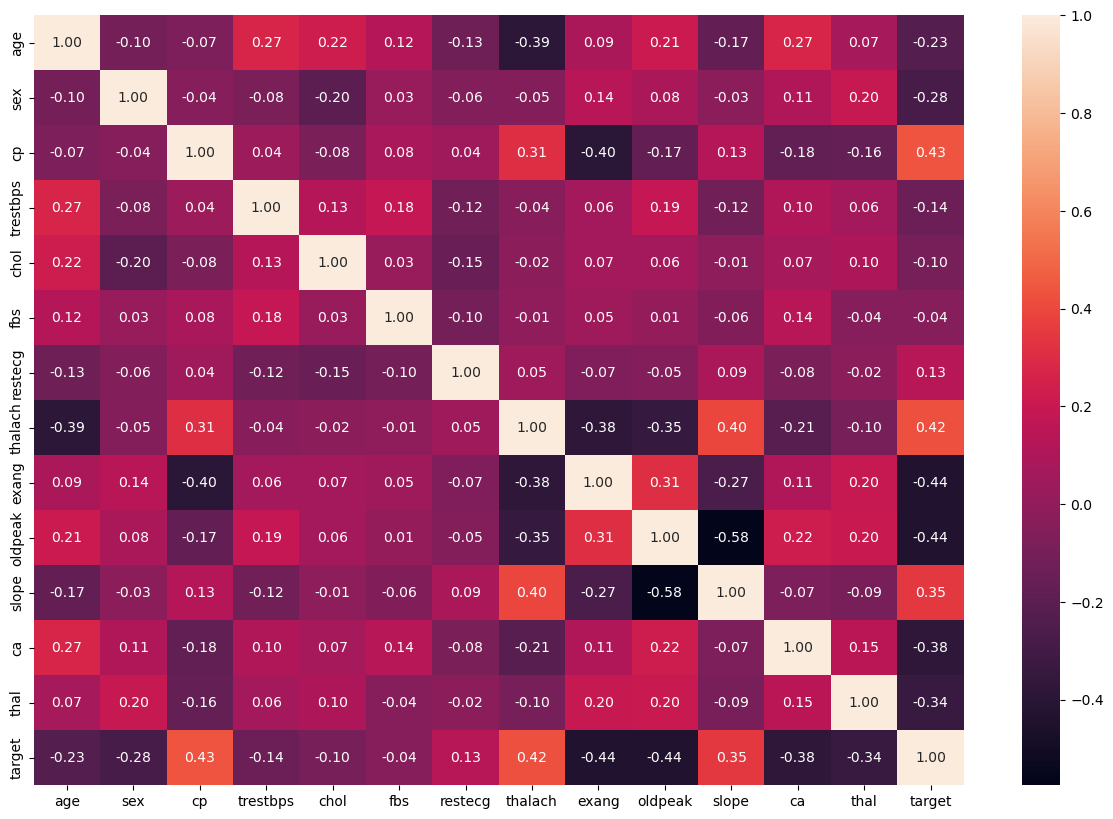

In [9]:
# prompt: plot cell 19

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


1 represent defitive heart
0 represent good heart

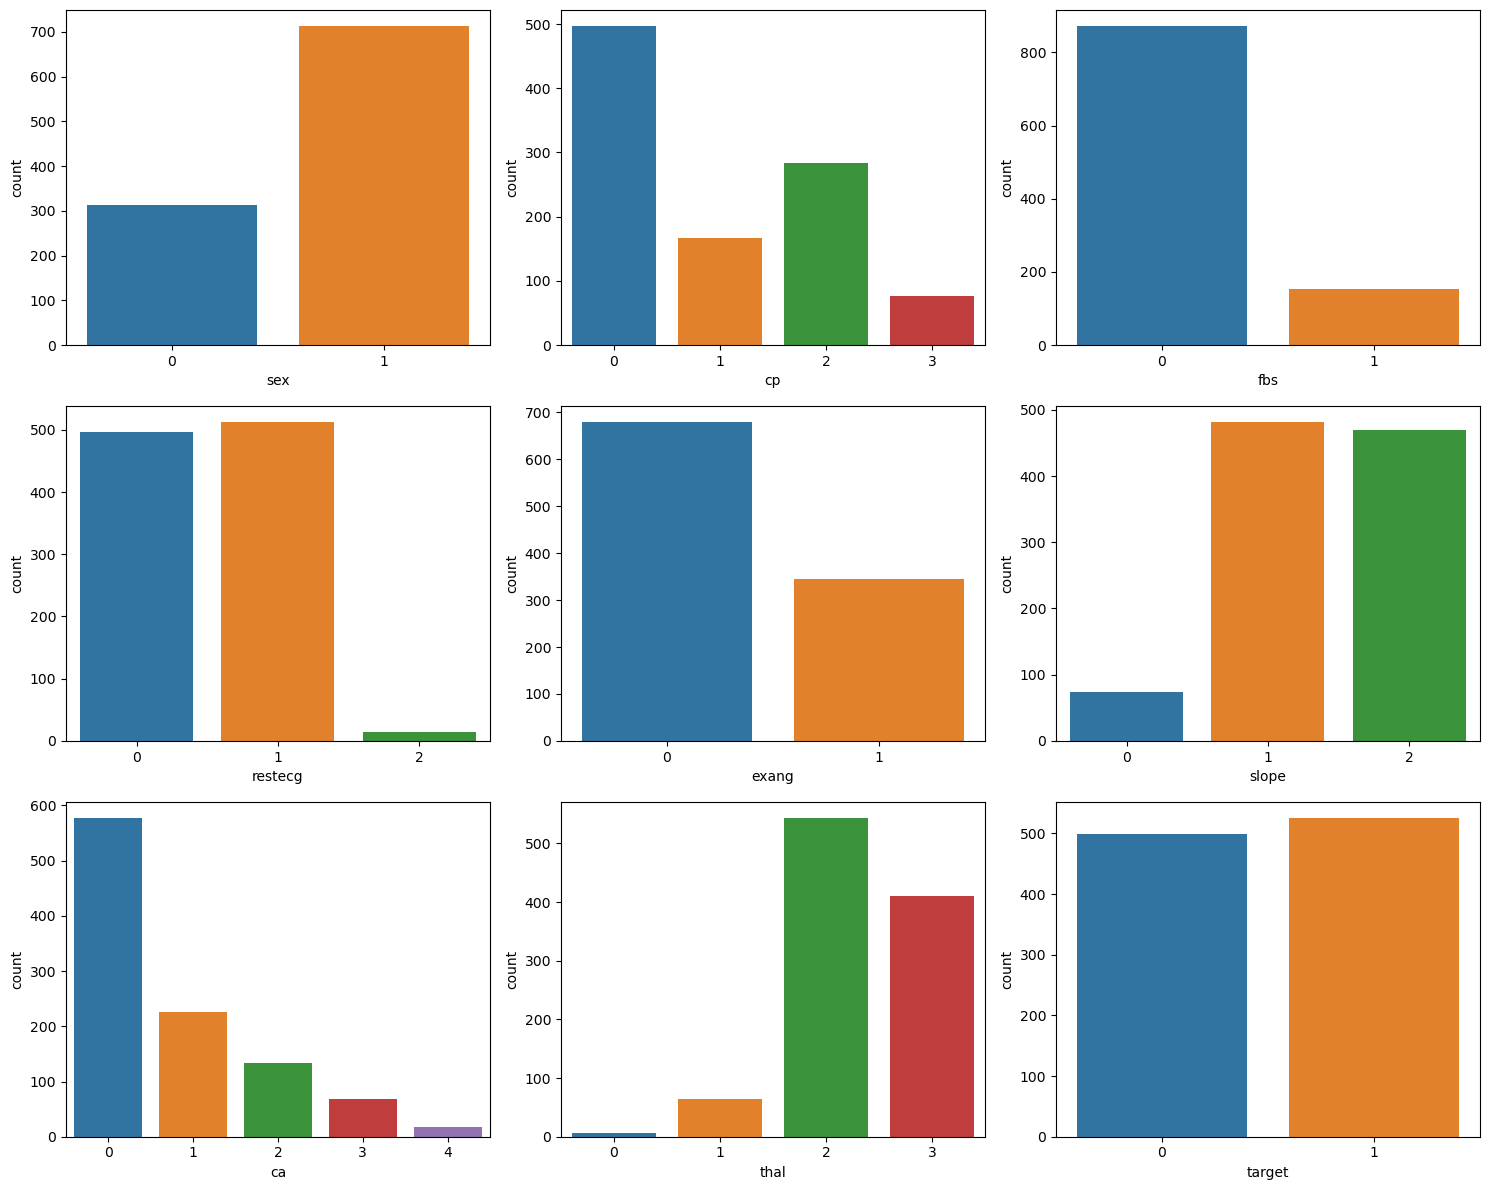

In [10]:
# Bar plots for categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, data=heart_data, ax=axes[row, col])

plt.tight_layout()
plt.show()


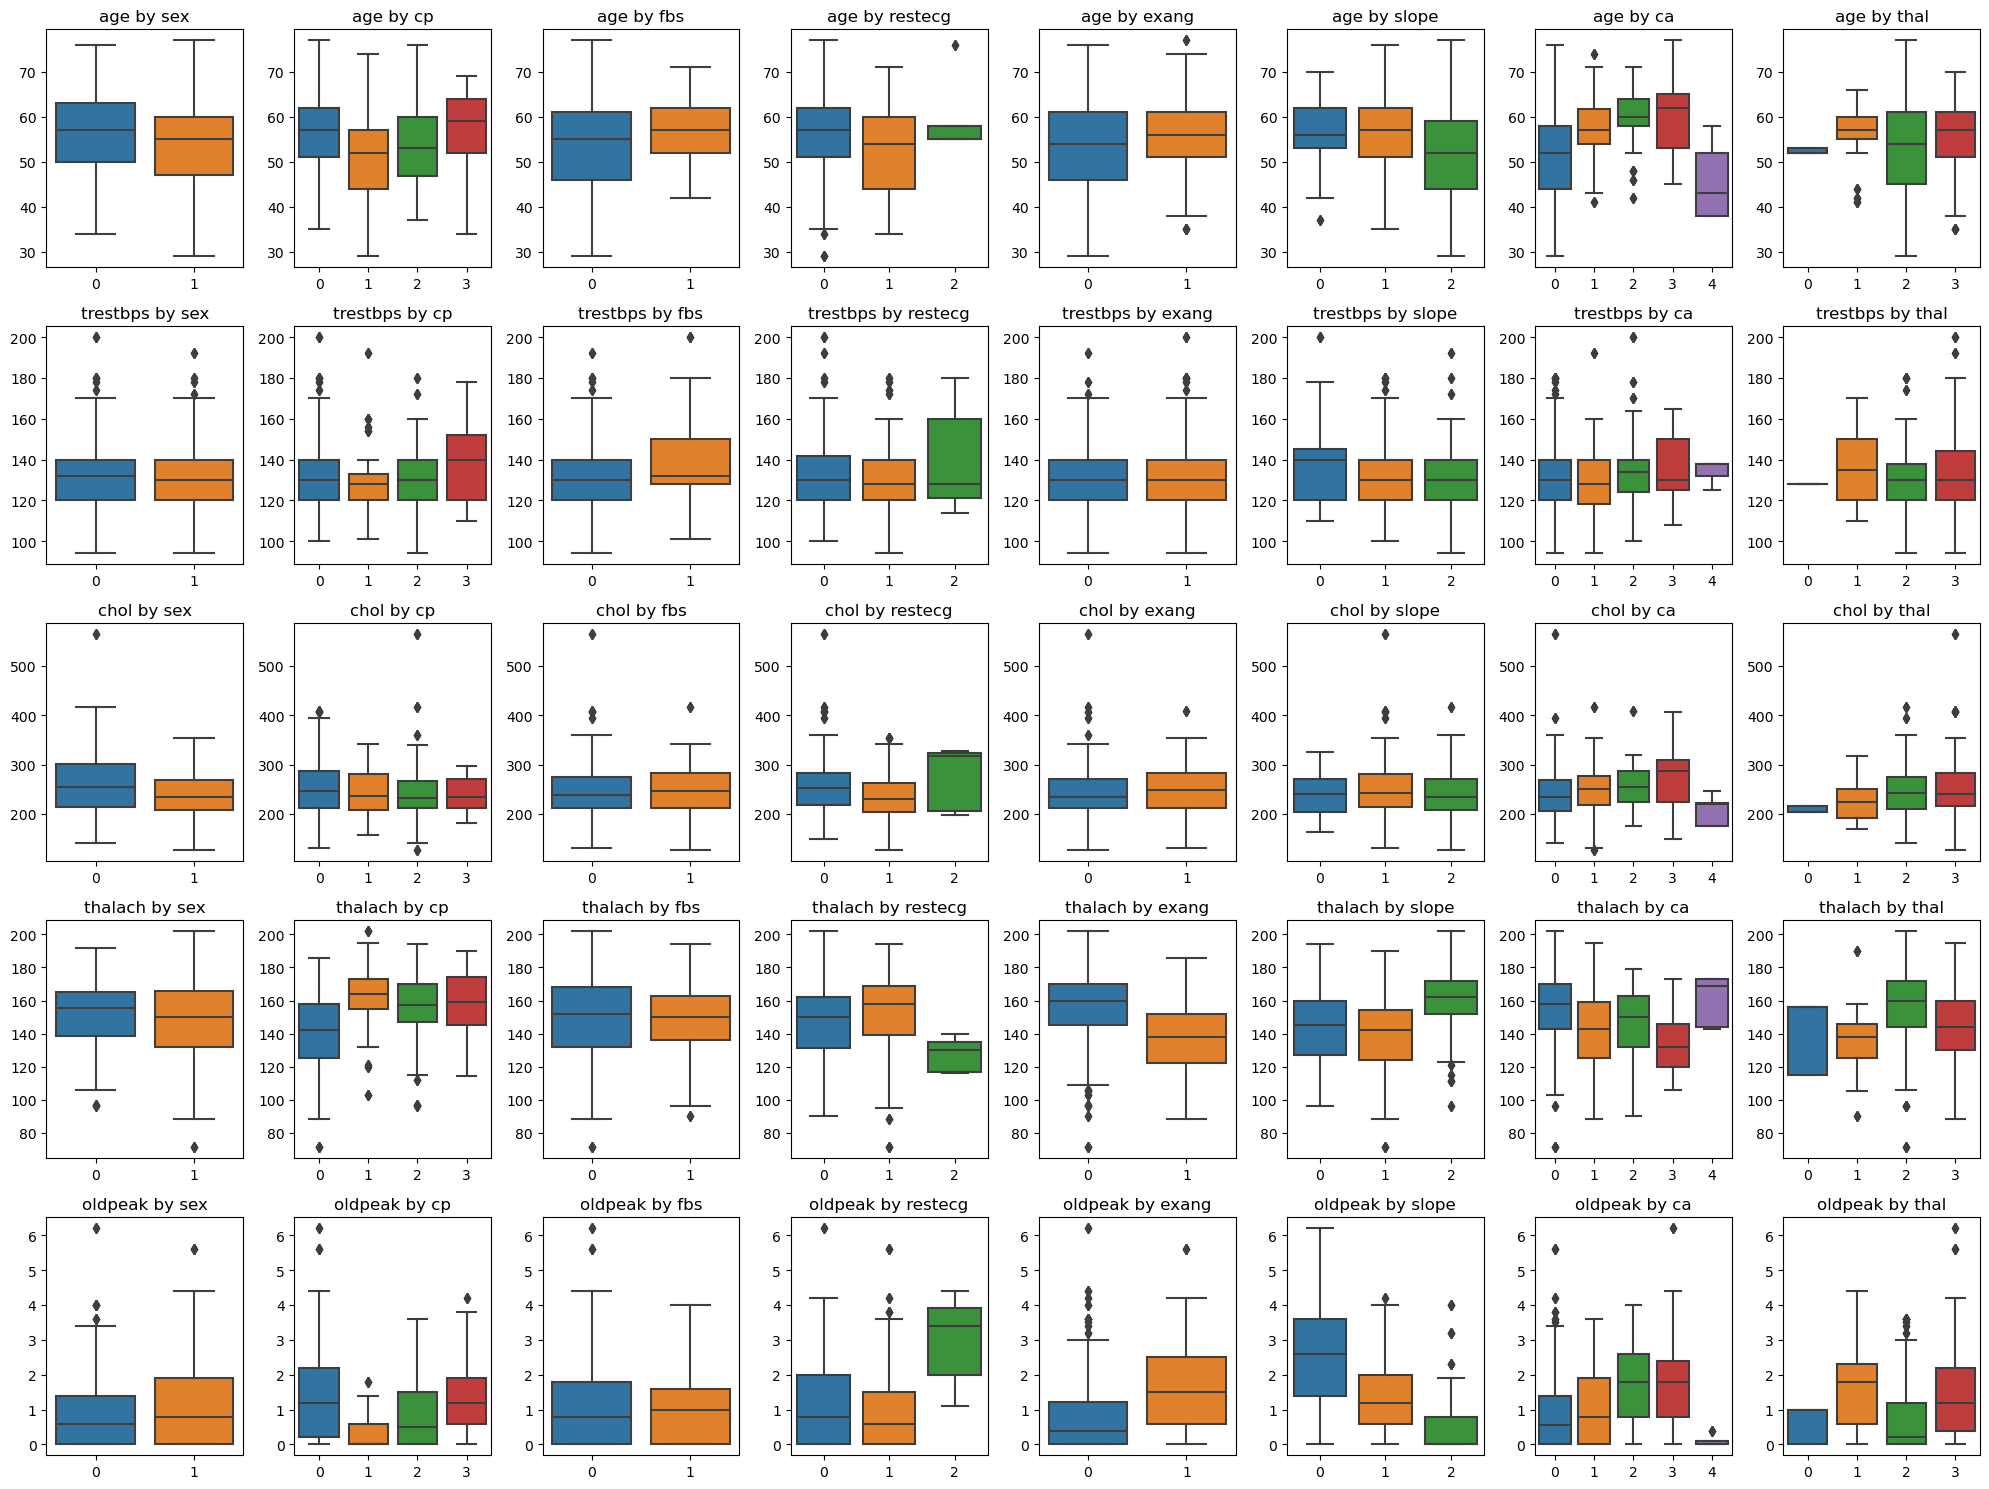

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'heart_data' is your DataFrame loaded with the dataset information

# Selecting a subset of categorical variables for visualization
categorical_vars_subset = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Selecting a subset of continuous variables to explore against categorical variables
continuous_vars_subset = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create box plots
fig, axes = plt.subplots(len(continuous_vars_subset), len(categorical_vars_subset), figsize=(20, 15))

for i, cont_var in enumerate(continuous_vars_subset):
    for j, cat_var in enumerate(categorical_vars_subset):
        sns.boxplot(ax=axes[i, j], x=heart_data[cat_var], y=heart_data[cont_var])
        axes[i, j].set_title(f'{cont_var} by {cat_var}')
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
#  write a function for examining data in terms of shape , null values and describe and type

def examine_data(df):
  """
  This function examines a DataFrame and provides information about its shape, null values, describe and type.

  Args:
      df: A Pandas DataFrame.

  Returns:
      None
  """
  # Print the shape of the DataFrame
  print("Shape:", df.shape)

  # Check for null values
  print("Null Values:")
  print(df.isnull().sum())

  # Print the describe of the DataFrame
  print("Describe:")
  print(df.describe())

  # Print the type of the DataFrame
  print("Type:")
  print(df.dtypes)

# Use the function on the heart_data DataFrame
examine_data(heart_data)


Shape: (1025, 14)
Null Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Describe:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000

In [14]:
def preprocess_data(df, target_column):
  """
  Preprocesses data for machine learning.

  Args:
      df: The pandas DataFrame containing the data.
      target_column: The name of the target column.

  Returns:
      A pandas DataFrame containing the preprocessed data.
  """

  # Drop the target column


  # Separate features and target
  X = df.drop(columns=[target_column])
  y = df[target_column]

  # Impute missing values
  if X.isnull().sum().sum() > 0:
    X = X.select_dtypes(include=["object"]).fillna(df.mode())

  else:
    X=X.select_dtypes(include=['int64','float64']).fillna(df.mean())

  # Encode categorical columns
  # Select categorical columns
  categorical_columns = df.select_dtypes(include=["object"]).columns

  # Encode categorical columns
  ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  encoded_X = pd.concat([X.drop(categorical_columns, axis=1),
                            pd.DataFrame(ohe.fit_transform(X[categorical_columns]))], axis=1)

  # Scale numerical columns
  numerical_columns = X.select_dtypes(exclude=["object"]).columns
  scaler = StandardScaler()
  scaled_X = pd.DataFrame(scaler.fit_transform(encoded_X[numerical_columns]), columns=numerical_columns)

  # Check if oversampling is needed
  target_counts = y.value_counts()
  majority_class_count = target_counts.max()
  minority_class_count = target_counts.min()
  imbalance_ratio = majority_class_count / minority_class_count

  if imbalance_ratio > 1.5:
    # Oversample minority class
    oversampler = RandomOverSampler()
    scaled_X, y = oversampler.fit_resample(scaled_X,y)
  else:
    y = df[target_column]

  return scaled_X, y

# Use the function on the heart_data DataFrame
scaled_X, y = preprocess_data(heart_data, "target")

# Examine the preprocessed data
examine_data(scaled_X)

Shape: (1025, 13)
Null Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
Describe:
                age           sex            cp      trestbps          chol  \
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03   
mean  -3.431402e-16  1.802352e-16  5.545699e-17 -7.036106e-16 -3.466062e-18   
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00   
min   -2.804866e+00 -1.511706e+00 -9.157554e-01 -2.148237e+00 -2.327054e+00   
25%   -7.095548e-01 -1.511706e+00 -9.157554e-01 -6.632165e-01 -6.787242e-01   
50%    1.726817e-01  6.615041e-01  5.593123e-02 -9.205458e-02 -1.163527e-01   
75%    7.240794e-01  6.615041e-01  1.027618e+00  4.791073e-01  5.623715e-01   
max    2.488552e+00  6.615041e-01  1.999305e+00  3.906079e+00  6.166694e+00   

                fbs       restecg       thalach     

In [15]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [16]:
y.shape

(1025,)

In [17]:
scaled_X.shape

(1025, 13)

In [26]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.5/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 0.9/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.7/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 2.3/99.8 MB 7.7 MB/s eta 0:00:13
   - -------------------------------------- 3.2/99.8 MB 8.9 MB/s eta 0:00:11
   - -------------------------------------- 3.9/99.8 MB 9.6 MB/s eta 0:00:10
   - -------------------------------------- 

In [28]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.0 MB/s eta 0:00:00


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

def split_and_train(scaled_X,y, model_list):
    """
    This function splits a DataFrame into training and testing sets, and then trains multiple models on the training data.
    It also evaluates each model on the testing set and returns their performance metrics.

    Args:
        df: A Pandas DataFrame.
        target_column: The name of the target column.
        model_list: A list of machine learning models.

    Returns:
        A dictionary with trained models as keys and their evaluation metrics as values.
    """
    # Separate the features and the target variable


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

    # Initialize a dictionary to hold trained models and their evaluation metrics
    model_performance = {}

    # Train each model on the training data and evaluate
    for model in model_list:
        model.fit(X_train, y_train)
        model_name = model.__class__.__name__

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

        # Store the model and its performance metrics
        model_performance[model_name] = {'Model': model, 'Metrics': metrics}

        # Optionally print the results
        print(f"Model: {model_name}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}")
        print()

    return model_performance


In [30]:


# Instantiate each model
model_list = [
    LogisticRegression(max_iter=1000),  # Increase max_iter if needed for convergence
    DecisionTreeClassifier(),
    SVC(probability=True),  # Enable probability for SVC to use methods like predict_proba
    KNeighborsClassifier(),
    RandomForestClassifier(),]

# Assuming 'preprocessed_heart_data' is your DataFrame and 'target' is the target column
split_and_train(scaled_X,y, model_list)




Model: LogisticRegression
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79

Model: DecisionTreeClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Model: SVC
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Model: KNeighborsClassifier
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1 Score: 0.83

Model: RandomForestClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99



{'LogisticRegression': {'Model': LogisticRegression(max_iter=1000),
  'Metrics': {'Accuracy': 0.7951219512195122,
   'Precision': 0.8023441707936719,
   'Recall': 0.7951219512195122,
   'F1 Score': 0.7937867291266357}},
 'DecisionTreeClassifier': {'Model': DecisionTreeClassifier(),
  'Metrics': {'Accuracy': 0.9853658536585366,
   'Precision': 0.9857839721254356,
   'Recall': 0.9853658536585366,
   'F1 Score': 0.9853637641109759}},
 'SVC': {'Model': SVC(probability=True),
  'Metrics': {'Accuracy': 0.8878048780487805,
   'Precision': 0.8922686641556987,
   'Recall': 0.8878048780487805,
   'F1 Score': 0.8874512628987706}},
 'KNeighborsClassifier': {'Model': KNeighborsClassifier(),
  'Metrics': {'Accuracy': 0.8341463414634146,
   'Precision': 0.83869918699187,
   'Recall': 0.8341463414634146,
   'F1 Score': 0.8335281942268965}},
 'RandomForestClassifier': {'Model': RandomForestClassifier(),
  'Metrics': {'Accuracy': 0.9853658536585366,
   'Precision': 0.9857839721254356,
   'Recall': 0.985

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# split  preprocessed dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Initialize the models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Define a function to perform cross-validation and print scores
def perform_cross_validation(model, scaled_X, y, cv=5):
    scoring = {'accuracy': 'accuracy',
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1': make_scorer(f1_score, average='weighted')}

    scores = cross_val_score(model, scaled_X, y, cv=cv, scoring='accuracy')
    print(f"Accuracy (mean): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    for metric, scorer in scoring.items():
        scores = cross_val_score(model, scaled_X, y, cv=cv, scoring=scorer)
        print(f"{metric.capitalize()} (mean): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Perform cross-validation for Decision Tree
print("Decision Tree Classifier:")
perform_cross_validation(decision_tree, X_train, y_train)

# Perform cross-validation for Random Forest
print("\nRandom Forest Classifier:")
perform_cross_validation(random_forest, X_train, y_train)


Decision Tree Classifier:
Accuracy (mean): 0.98 (+/- 0.04)
Accuracy (mean): 0.97 (+/- 0.04)
Precision (mean): 0.98 (+/- 0.04)
Recall (mean): 0.98 (+/- 0.04)
F1 (mean): 0.98 (+/- 0.04)

Random Forest Classifier:
Accuracy (mean): 0.98 (+/- 0.04)
Accuracy (mean): 0.98 (+/- 0.04)
Precision (mean): 0.98 (+/- 0.03)
Recall (mean): 0.98 (+/- 0.04)
F1 (mean): 0.98 (+/- 0.04)


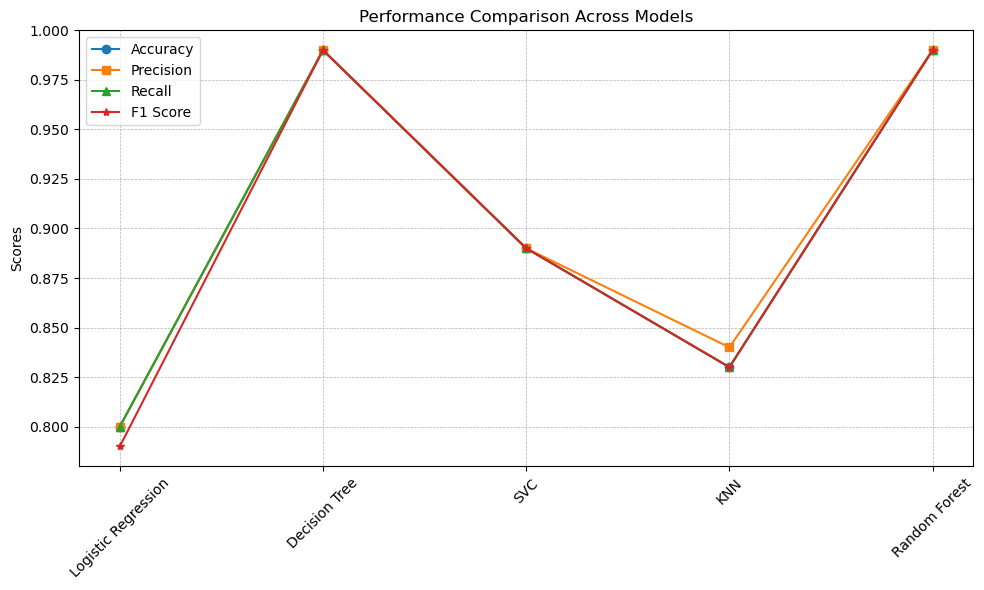

In [23]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'SVC', 'KNN', 'Random Forest']

# Scores for each model
accuracy_scores = [0.80, 0.99, 0.89, 0.83, 0.99]
precision_scores = [0.80, 0.99, 0.89, 0.84, 0.99]
recall_scores = [0.80, 0.99, 0.89, 0.83, 0.99]
f1_scores = [0.79, 0.99, 0.89, 0.83, 0.99]

# Setting the positions and width for the bars
positions = list(range(len(models)))

# Plotting each metric
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_scores, marker='o', linestyle='-', label='Accuracy')
plt.plot(models, precision_scores, marker='s', linestyle='-', label='Precision')
plt.plot(models, recall_scores, marker='^', linestyle='-', label='Recall')
plt.plot(models, f1_scores, marker='*', linestyle='-', label='F1 Score')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
plt.ylabel('Scores')
plt.title('Performance Comparison Across Models')
plt.xticks(positions, models, rotation=45)
plt.legend()

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


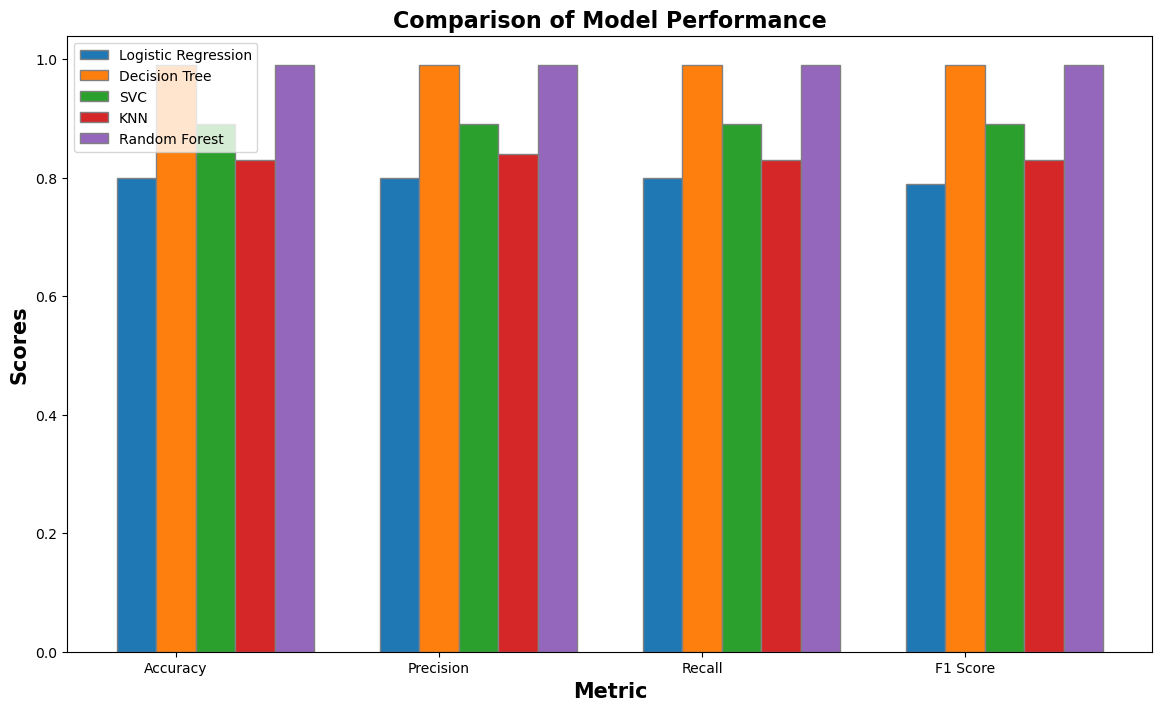

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the scores
scores = {
    'Logistic Regression': {'Accuracy': 0.80, 'Precision': 0.80, 'Recall': 0.80, 'F1 Score': 0.79},
    'Decision Tree': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1 Score': 0.99},
    'SVC': {'Accuracy': 0.89, 'Precision': 0.89, 'Recall': 0.89, 'F1 Score': 0.89},
    'KNN': {'Accuracy': 0.83, 'Precision': 0.84, 'Recall': 0.83, 'F1 Score': 0.83},
    'Random Forest': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1 Score': 0.99}
}

metrics = list(scores['Logistic Regression'].keys())
n_metrics = len(metrics)
n_models = len(scores)

# Create an array with the positions of each group on the x-axis
barWidth = 0.15
r = np.arange(n_metrics)

# Create the bar plots
plt.figure(figsize=(14, 8))

for i, (model, model_scores) in enumerate(scores.items()):
    plt.bar(r + i * barWidth, model_scores.values(), width=barWidth, edgecolor='grey', label=model)

# Add labels to the plot
plt.xlabel('Metric', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(n_metrics)], metrics)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.title('Comparison of Model Performance', fontweight='bold', fontsize=16)

# Create legend & Show graphic
plt.legend()
plt.show()
